# Анализ и оптимизация выручки интернет-магазина через A/B-тестирование гипотез

**Описание проекта**. Данное исследование выполнено для интернет-магазина. На первом этапе в нём приоритизируются гипотезы для увеличения выручки, подготовленные вместе с отделом маркетинга, по фреймворкам ICE и RICE. На втором этапе проводится A/B-тестирование. 

## Импорт библиотек

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

## Приоритизация гипотез

In [2]:
# загрузим данные с гипотезами
hypothesis = pd.read_csv('C:/Users/alkon/practicum_projects/app_profit_project/hypothesis.csv')

In [3]:
# зададим параметры отображения 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# познакомимся с датафреймом
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# для удобства приведём названия столбцов к нижнему регистру 
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
# выведем информацию о датафрейме, в данном случае ограничимся info()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# рассчитаем ICE для каждой гипотезы
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# рассчитаем RICE для каждой гипотезы
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [7]:
# выведем общий результат
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


In [8]:
# округляем метрики ICE до двух знаков после запятой
hypothesis['ice'] = hypothesis['ice'].round(2)
# округляем метрики RICE до двух знаков после запятой
hypothesis['rice'] = hypothesis['rice'].round(2)

In [9]:
print("Приоритизация гипотез с помощью ICE:")
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))

print("\nПриоритизация гипотез с помощью RICE:")
display(hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))

Приоритизация гипотез с помощью ICE:


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00



Приоритизация гипотез с помощью RICE:


,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод.** Видим, что приоритизация гипотез по ICE и RICE — разная. Это обусловлено тем, что в RICE учитывается параметр *Reach* (охват). Если гипотеза затронет многих пользователей, то она может получить высокий приоритет, даже если у нее низкие оценки *Impact* и *Confidence*. 

Топ-3 гипотез по фреймворку ICE c высокими показателями *Impact* и *Confidence*: 
- Запустить акцию, дающую скидку на товар в день рождения (8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

Топ-3 гипотез по фреймворку RICE с высоким показателем *Reach*: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

Гипотезы 0 и 7 вошли заняли лидирующие позиции в обоих фреймворках.

## Анализ A/B-теста

In [10]:
# загрузим данные о заказах
orders = pd.read_csv('C:/Users/alkon/practicum_projects/app_profit_project/orders.csv')

# загрузим данные о посетителях
visitors = pd.read_csv('C:/Users/alkon/practicum_projects/app_profit_project/visitors.csv')

In [11]:
# Вывод информации о пропусках и дубликатах для датафрейма orders
print("Информация о пропусках и дубликатах в датафрейме 'orders':")
print("Количество пропусков в 'orders':", orders.isna().sum().sum())
print("Количество дубликатов в 'orders':", orders.duplicated().sum())

# Вывод информации о пропусках и дубликатах для датафрейма visitors
print("\nИнформация о пропусках и дубликатах в датафрейме 'visitors':")
print("Количество пропусков в 'visitors':", visitors.isna().sum().sum())
print("Количество дубликатов в 'visitors':", visitors.duplicated().sum())

Информация о пропусках и дубликатах в датафрейме 'orders':
Количество пропусков в 'orders': 0
Количество дубликатов в 'orders': 0

Информация о пропусках и дубликатах в датафрейме 'visitors':
Количество пропусков в 'visitors': 0
Количество дубликатов в 'visitors': 0


In [12]:
# преобразуем столбцы с датами
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
# проверим совпадают ли даты в обоих таблицах
set(orders['date'].unique()) == set(visitors['date'].unique())

True

Даты в таблицах совпадают.

In [14]:
# проверим совпадают ли группы в обоих таблицах
set(orders['group'].unique()) == set(visitors['group'].unique())

True

Группы в таблицах также совпадают.

In [15]:
# определяем количество уникальных групп
unique_groups = orders['group'].unique()

# определяем даты начала и окончания теста
start_date = orders['date'].min()
end_date = orders['date'].max()

# определяем количество уникальных пользователей в каждой группе
unique_users_group_A = orders[orders['group'] == 'A']['visitorId'].nunique()
unique_users_group_B = orders[orders['group'] == 'B']['visitorId'].nunique()

# выводим полученные результаты
print("Количество уникальных групп в А/В тесте:", len(unique_groups))
print("Дата начала теста:", start_date)
print("Дата окончания теста:", end_date)
print("Количество уникальных пользователей в группе A:", unique_users_group_A)
print("Количество уникальных пользователей в группе B:", unique_users_group_B)


Количество уникальных групп в А/В тесте: 2
Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00
Количество уникальных пользователей в группе A: 503
Количество уникальных пользователей в группе B: 586


В тесте 2 группы, количество уникальных пользователей не сбалансировано, ниже посчитаем в процентном соотношении. Временные рамки теста: с 1 августа по 31 августа 2019 года. 

Проверим, есть ли пользователи, которые попали в две группы одновременно.

In [16]:
# группируем данные по visitorId и считаем количество уникальных групп для каждого пользователя
users_in_both_groups_orders = orders.groupby('visitorId')['group'].nunique()

# выбираем пользователей, у которых количество уникальных групп больше 1
users_in_both_groups_orders = users_in_both_groups_orders[users_in_both_groups_orders > 1]

if not users_in_both_groups_orders.empty:
    print("Количество пользователей, попавших одновременно в две группы:")
    print(users_in_both_groups_orders.count())
else:
    print("Нет пользователей, попавших в две группы одновременно в таблице 'orders'.")

Количество пользователей, попавших одновременно в две группы:
58


In [17]:
# удалим пользователей, у которых задублированы группы
orders = orders[~orders['visitorId'].isin(users_in_both_groups_orders.index)]

In [18]:
# считаем количество уникальных пользователей в каждой группе
unique_visitors_by_group = orders.groupby('group')['visitorId'].nunique()

# считаем разницу
percentage_difference = ((unique_visitors_by_group['B'] - unique_visitors_by_group['A'])
                         / unique_visitors_by_group['A']) * 100

print("Разница между группами: {:.2f}%".format(percentage_difference))

Разница между группами: 18.65%


Дублирование пользователей в группах и разница размеров групп может свидетельствовать об ошибках в проведении теста, влияющих на точность его результата. 

Подготовим данные для анализа.

In [19]:
# подготовка данных о посетителях группы A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACumulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACumulative.columns = ['date', 'visitorsCummulativeA']

# подготовка данных о посетителях группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCumulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCumulative.columns = ['date', 'visitorsCummulativeB']

# подготовка данных о заказах группы A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACumulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# подготовка данных о заказах группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCumulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединение данных
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


### Кумулятивная выручка

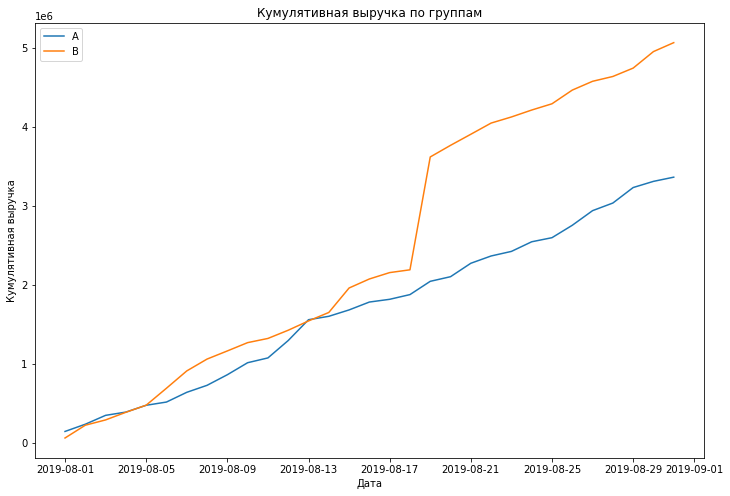

In [20]:
# построение графика кумулятивной выручки по группам
plt.figure(figsize=(12, 8))  
plt.plot(data['date'], data['revenueCummulativeA'], label='A') 
plt.plot(data['date'], data['revenueCummulativeB'], label='B') 


plt.title('Кумулятивная выручка по группам')  
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.legend()

plt.show()


Видим, что кумулятивная выручка на старте у двух групп приблизительно равная, однако, начиная с 5 августа выручка группы B начинает расти, претерпевая резкий скачок вверх приблизительно 18 августа. Возможно, во второй половине августа у клиентов группы B наблюдался всплеск числа заказов или увеличение сумм заказов (дорогие покупки).

### Средний чек 

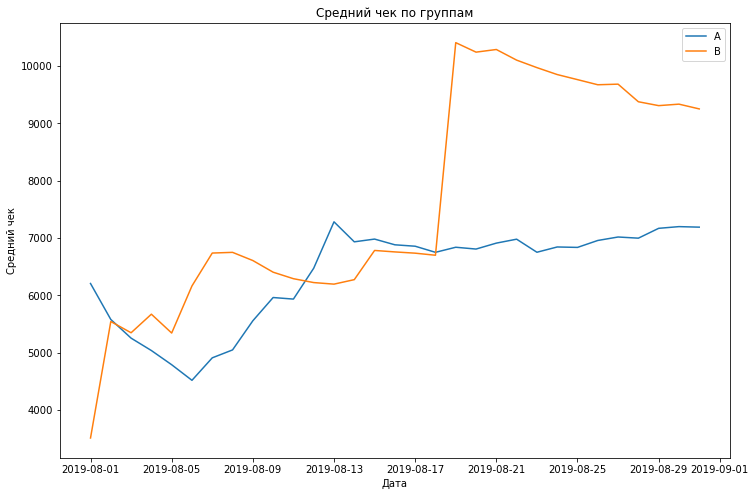

In [21]:
# построение графика среднего чека по группам
plt.figure(figsize=(12, 8))
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label='B')

plt.title('Средний чек по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()

plt.show()


Видим сильные скачки на графиках для обеих групп. Средний чек для группы A претерпевает спад до 6-7 августа, затем планомерно растет, достигая пика 13 августа, после чего стабилизируется. При этом мы видим, что в группе B средний чек в целом растет, колеблется до 17 августа, а затем мы видим резкий скачок 18 августа, что совпадает со скачком кумулятивной выручки. Это значит, что в этой группе присутствуют очень дорогие заказы — потенциально выбросы.

### Относительное изменение кумулятивного среднего чека

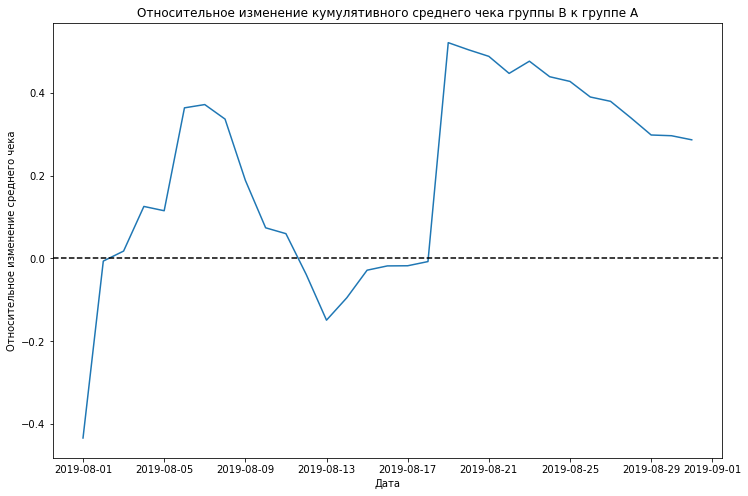

In [22]:
# рассчитаем относительное изменение кумулятивного среднего чека группы B к группе A
cumulative_revenue_A = data['revenueCummulativeA'] / data['ordersCummulativeA']
cumulative_revenue_B = data['revenueCummulativeB'] / data['ordersCummulativeB']
relative_difference = cumulative_revenue_B / cumulative_revenue_A - 1

# построим график относительного изменения
plt.figure(figsize=(12, 8))
plt.plot(data['date'], relative_difference, label='Относительное изменение среднего чека B к A')

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменение среднего чека')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

На графике различия есть несколько значительных «скачков», в которых группа B превысила показетели группы А, 7 и 18-19 августа: скорее всего они связаны с выбросами. Между пиковыми значениями 13 августа группа B показывает спад.

### Кумулятивное среднее количество заказов на посетителя

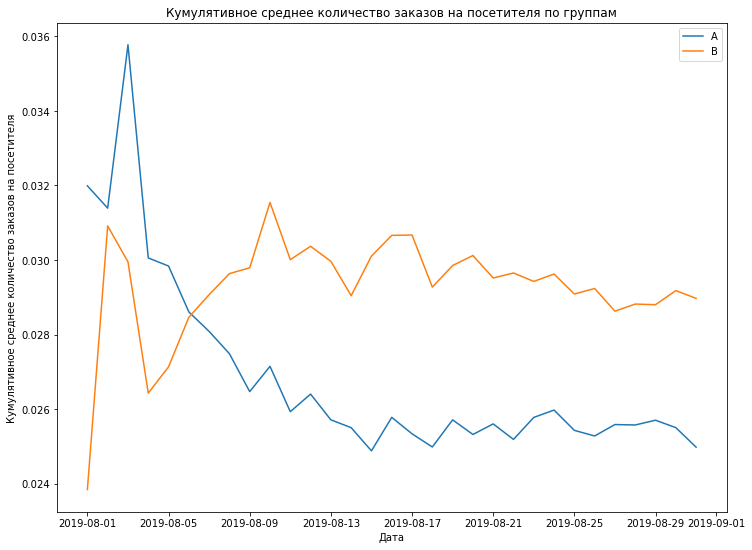

In [23]:
# рассчитаем кумулятивное среднее количество заказов на посетителя для группы A и B
data['cumulative_orders_per_visitor_A'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['cumulative_orders_per_visitor_B'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

# построим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(12, 9))
plt.plot(data['date'], data['cumulative_orders_per_visitor_A'], label='A')
plt.plot(data['date'], data['cumulative_orders_per_visitor_B'], label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.legend()

plt.show()

Видим резкие «скачки» среднего количества заказов на посетителя для обеих групп в начале периода до 3 августа. Группа B показывает спад в районе 5 августа, затем растет к ~11 августа, и при локальных колебаниях идет на небольшое снижение в общем. При этом до конца периода сильно превышает показатели группы А. Группа A, напротив, после резкого роста конверсии показывает такой же резкий спад, продолжающийся до 15 августа, затем с поправкой на колебания стабилизируется и остается низким. 

### Относительное изменение кумулятивного среднего количества заказов на посетителя

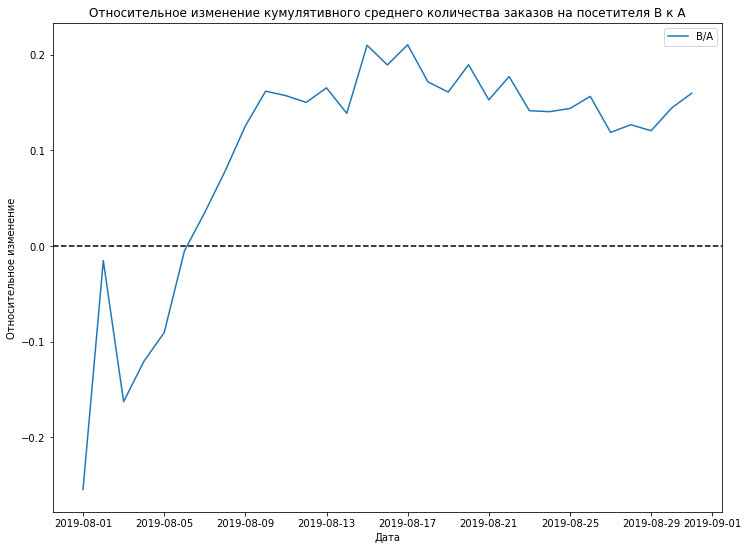

In [24]:
# рассчитаем относительное изменение кумулятивной среднего количества заказов на посетителя
data['relative_change_in_avg_orders_per_visitor'] = (data['cumulative_orders_per_visitor_B'] /
                                                    data['cumulative_orders_per_visitor_A'] - 1)

# построим график относительного изменения кумулятивного среднего количества заказов на посетителя
plt.figure(figsize=(12, 9))
plt.plot(data['date'], data['relative_change_in_avg_orders_per_visitor'], label='B/A')

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя B к A')
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.legend()

plt.show()

Группа B проигрывала группе А только на старте, однако показывает сильный рост, начиная с 2-3 августа и затем постоянно растет.

### Количество заказов по пользователям

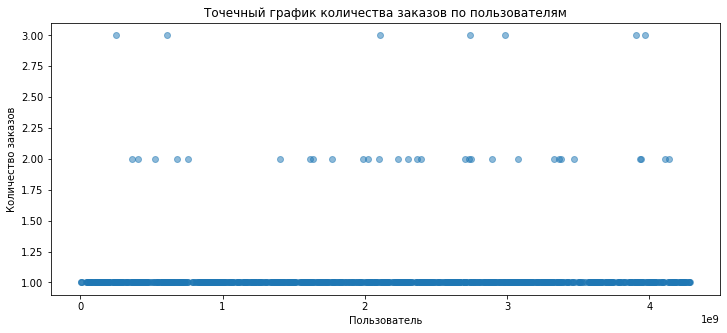

In [25]:
# создадим датафрейм с данными о количестве заказов для каждого пользователя
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_per_user.columns = ['visitorId', 'ordersCount']

# построим точечный график
plt.figure(figsize=(12, 5))
plt.scatter(orders_per_user['visitorId'], orders_per_user['ordersCount'], alpha=0.5)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()


Большинство пользователей совершили 1 заказ. Лишь маленькая часть пользователей совершили 2-3 и менее заказов. Ниже определим аномальных пользователей с помощью перцентилей.

### Граница аномальных пользователей

In [26]:
# рассчитываем 95-й и 99-й перцентили количества заказов на пользователя
orders_percentiles = np.percentile(orders_per_user['ordersCount'], [95, 99])
print("95-й перцентиль:", orders_percentiles[0])
print("99-й перцентиль:", orders_percentiles[1])

95-й перцентиль: 1.0
99-й перцентиль: 2.0


Не более 5% пользователей совершили 1 заказ, и не более 1% — 2+ заказов. С учетом этих значений и графика выше установим границу аномальных пользователей на 95ом перцентиле.

In [27]:
# граница аномальных пользователей
abnormal_orders = orders_percentiles[1]

### Точечный график стоимости заказов

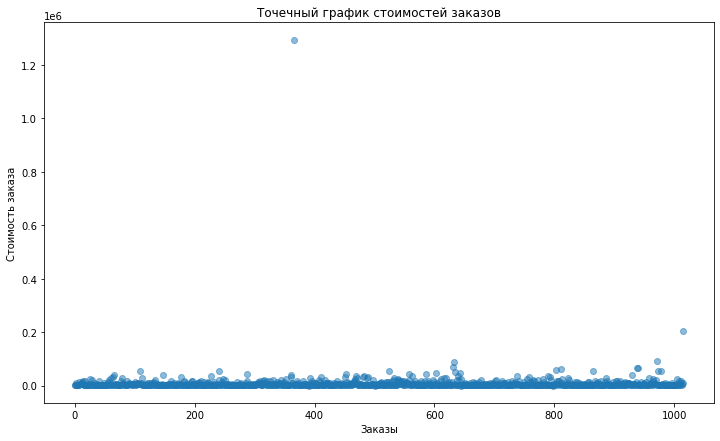

In [28]:
# построим точечный график стоимостей заказов
plt.figure(figsize=(12, 7))
plt.scatter(range(len(orders['revenue'])), orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы')
plt.show()

Даже при таком масштабе графика с учетом выброса в виде очень дорогого заказа в ~1.3 млн мы видим, что в целом стоимость заказов не превышает 100 тыс. Установим границу аномальных заказов с помощью перцентилей.

### Граница аномальных заказов

In [29]:
# рассчитываем 95-й и 99-й перцентили стоимости заказов
revenue_percentiles = np.percentile(orders['revenue'], [95, 99])
print("95-й перцентиль стоимости заказов: {:.2f}".format(revenue_percentiles[0]))
print("99-й перцентиль стоимости заказов: {:.2f}".format(revenue_percentiles[1]))

95-й перцентиль стоимости заказов: 26785.00
99-й перцентиль стоимости заказов: 53904.00


Не более 5% заказов по стоимости превышают 27 тыс., и не более 1% — 54 тыс. Установим границу аномальных заказов на 95ом перцентиле.

In [30]:
# граница аномальных заказов
abnormal_revenue = revenue_percentiles[0]

### Статистическая значимость различий между группами по «сырым» данным

#### Среднее количество заказов

Сформулируем гипотезы.

**Нулевая гипотеза (H₀):** Среднее количество заказов на посетителя в группе А и группе В одинаково по «сырым» данным.<br/>
**Альтернативная гипотеза (H₁):** Среднее количество заказов на посетителя в группе А и группе В различается по «сырым» данным.

Уровень статистической значимости (alpha) установим на 0.05.

Применим критерий Манна-Уитни, поскольку он подходит для данных с нестандартными распределениями: выше по графикам мы видели, что в показателях присутствуют выбросы. 

In [31]:
# получаем данные о количестве заказов на пользователя для группы A и B
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

# формируем выборки для проведения теста Манна-Уитни
# для этого добавляем нули для пользователей, не сделавших заказы
raw_sample_a = pd.concat([orders_by_users_a['transactionId'], 
                          pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_a['transactionId'])))], axis=0)
raw_sample_b = pd.concat([orders_by_users_b['transactionId'], 
                          pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_b['transactionId'])))], axis=0)

# проводим статистический тест
p_value = st.mannwhitneyu(raw_sample_a, raw_sample_b)[1]

print("p-значение: {0:.3f}".format(p_value))
print("Относительное различие в среднем количестве заказов между группами: {0:.1f}%".format((raw_sample_b.mean() / raw_sample_a.mean() - 1)*100))

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия между группами.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: статистически значимых различий между группами нет.")

p-значение: 0.011
Относительное различие в среднем количестве заказов между группами: 16.0%
Отвергаем нулевую гипотезу: есть статистически значимые различия между группами.


Относительное различие в среднем количестве заказов между группами составляет 16%, что указывает на то, что группа B показывает более высокое среднее количество заказов на пользователя по сравнению с группой A. 

#### Средний чек

Сформулируем гипотезы.

**Нулевая гипотеза (H₀):** Статистически значимых различий в среднем чеке заказа между группами A и B по «сырым» данным нет.<br/>
**Альтернативная гипотеза (H₁):** Статистически значимое различие в среднем чеке заказа между группами A и B по по «сырым» данным есть.

Уровень статистической значимости (alpha) установим на 0.05.

In [32]:
# вычисляем статистическую значимость различий в среднем чеке между группами
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

# вычисляем относительное различие в среднем чеке между группами
relative_difference = (orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1) * 100

print('p-значение: {0:.3f}'.format(p_value))
print('Относительное различие в среднем чеке между группами: {0:.1f}%'.format(relative_difference))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке между группами.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в среднем чеке между группами нет.')

p-значение: 0.829
Относительное различие в среднем чеке между группами: 28.7%
Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в среднем чеке между группами нет.


Группа B показывает более высокий результат, однако он не подтверждается статистически. Посмотрим на результаты теста по очищенным данным.

### Статистическая значимость различий между группами по «очищенным» данным

#### Среднее количество заказов на посетителя

Получим список аномальных пользователей по границам, определенным выше, и удалим этих пользователей из анализа.

In [33]:
# получим аномальных пользователей
abnormal_users = pd.concat([orders[orders['revenue'] > abnormal_revenue]['visitorId'], orders_per_user[orders_per_user['ordersCount'] > abnormal_orders]['visitorId']], axis=0).drop_duplicates()
print("Количество аномальных пользователей:", len(abnormal_users))

# получаем «очищенные» от аномальных пользоватаелей данные
clean_orders = orders[np.logical_not(orders['visitorId'].isin(abnormal_users))]

Количество аномальных пользователей: 58


In [34]:
# найдем количество уникальных пользователей до фильтрации
unique_users_before = orders['visitorId'].nunique()

# найдем количество уникальных пользователей после фильтрации
unique_users_after = clean_orders['visitorId'].nunique()

# рассчитаем относительные потери
relative_losses = (unique_users_before - unique_users_after) / unique_users_before

print('Относительные потери уникальных пользователей после фильтрации: {:.2%}'.format(relative_losses))

Относительные потери уникальных пользователей после фильтрации: 5.96%


Мы получили допустимый для данного теста уровень потерь в ~6%: было важно устранить аномалии и посмотреть на результаты теста.

**Нулевая гипотеза (H₀):** Статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по «очищенным» данным нет. <br/>
**Альтернативная гипотеза (H₁):** Статистически значимое различие в среднем количестве заказов на посетителя между группами A и B по «очищенным» данным есть.

In [35]:
# Получаем агрегированные данные по количеству заказов на пользователя для группы A и B по "очищенным" данным
orders_by_users_a_clean = clean_orders[clean_orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_b_clean = clean_orders[clean_orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

# Формируем выборки для проведения теста Манна-Уитни
sample_a_clean = pd.concat([orders_by_users_a_clean['transactionId'], 
                                pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_a_clean['transactionId'])))], axis=0)
sample_b_clean = pd.concat([orders_by_users_b_clean['transactionId'], 
                                pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_b_clean['transactionId'])))], axis=0)

# Проводим статистический тест Манна-Уитни
p_value_clean = st.mannwhitneyu(sample_a_clean, sample_b_clean)[1]

# Уровень статистической значимости
alpha = 0.05

# Выводим результаты и считаем относительное различие
print('p-значение для «очищенных» данных: {0:.3f}'.format(p_value_clean))
if p_value_clean < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия между группами по «очищенным» данным.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых различий между группами по «очищенным» данным нет.')

# Рассчитываем относительное различие в конверсии
relative_difference_clean = (sample_b_clean.mean() / sample_a_clean.mean() - 1) * 100
print('Относительное различие в конверсии между группами по «очищенным» данным: {0:.2f}%'.format(relative_difference_clean))

p-значение для «очищенных» данных: 0.012
Отвергаем нулевую гипотезу: есть статистически значимые различия между группами по «очищенным» данным.
Относительное различие в конверсии между группами по «очищенным» данным: 18.17%


Группа B лидирует и по очищенным данным.

#### Средний чек

**Нулевая гипотеза (H₀):** Статистически значимых различий в среднем чеке заказа между группами A и B по «очищенным» данным нет.<br/>
**Альтернативная гипотеза (H₁):** Статистически значимое различие в среднем чеке заказа между группами A и B по «очищенным» данным есть.

In [36]:
# формируем выборки для теста Манна-Уитни
sample_a_clean = clean_orders[clean_orders['group'] == 'A']['revenue']
sample_b_clean = clean_orders[clean_orders['group'] == 'B']['revenue']

# проводим статистический тест
p_value_clean_revenue = st.mannwhitneyu(sample_a_clean, sample_b_clean)[1]

alpha = 0.05

print('p-значение для среднего чека по «очищенным» данным: {0:.3f}'.format(p_value_clean_revenue))
if p_value_clean_revenue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке между группами по «очищенным» данным.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в среднем чеке между группами по «очищенным» данным нет.')
    
# считаем относительное различие
relative_difference_clean_revenue = ((sample_b_clean.mean() / sample_a_clean.mean()) - 1) * 100
print('Относительное различие в среднем чеке между группами по «очищенным» данным: {0:.2f}%'.format(relative_difference_clean_revenue))

p-значение для среднего чека по «очищенным» данным: 0.646
Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в среднем чеке между группами по «очищенным» данным нет.
Относительное различие в среднем чеке между группами по «очищенным» данным: -4.85%


Мы видим, что по очищенным данным баланс смещается в сторону группы А, но относительное различие при этом сильно сокращается.

## Выводы

По результатам A/B-теста можно сделать следующие выводы: 

- По всем кумулятивным метрикам группа B показывает в целом лучшие результаты, чем группа A. Однако на графиках заметны колебания.
- По сырым данным обнаружено статистически значимое различие между группами в количестве заказов. Группа А показывает более низкое среднее количество заказов на пользователя по сравнению с группой B. Тест по очищенным данным приблизительно повторяет результаты теста по сырым. 
- Относительное различие в среднем чеке между группами по сырым данным — 28.7% в пользу группы B, однако это различие не было подкреплено статистически. При этом по очищенным данным разница сильно сокращается — до -4.85%. 

С учетом графиков по кумулятивным показателям, статистически подкрепленного различия между группами в количестве заказов в пользу группы B и отсутствия статистического различия в среднем чеке можно **остановить тест и зафиксировать победу группы B**. 